## Imports

In [1]:
import neural_network as nn
import scipy.io
import numpy as np

%matplotlib inline

## Load and process training samples.

In [2]:
mat_data = scipy.io.loadmat('digits_data/hand_written_digits.mat')
X = mat_data['X']
y = mat_data['y']
augmented_matrix = np.append(X, y, axis=1)
np.random.shuffle(augmented_matrix)
X = augmented_matrix[:, :-1]
y = augmented_matrix[:, -1]

## Setup trainer

In [3]:
# Learning rate
alpha = 0.3
# Regularization
lamb = 10
# Random Theta rang
EPSILON_INIT = 0

digits_nn = nn.NeuralNetwork(X, y, alpha, lamb, EPSILON_INIT, 100)

## Start training

In [4]:
digits_nn.train(iter_limit=0, time_limit=3600 * 10, grad_check=True, info_print_frequency=500, save_to_file=False)

Started training...
Started gradient checking...
Checking 100 randomly selected thetas...
Gradient check passed.
Used 2.83s for gradient checking.
--------------------------------------------------
Iter: 1, duration: 4.40s, J(θ_train): 9.054367595989103, J(θ_cv): 3.6862508934289377, test set accuracy: 13.60%
Iter: 500, duration: 471.23s, J(θ_train): 0.8579079335530599, J(θ_cv): 3.728616505281153, test set accuracy: 90.10%
Iter: 1000, duration: 945.96s, J(θ_train): 0.766724843343099, J(θ_cv): 3.7172646195017416, test set accuracy: 90.30%
Iter: 1500, duration: 1430.67s, J(θ_train): 0.7348416595458984, J(θ_cv): 3.717521990755662, test set accuracy: 90.40%
Iter: 2000, duration: 1924.75s, J(θ_train): 0.7208086318969726, J(θ_cv): 3.7271365633295037, test set accuracy: 90.40%
Iter: 2500, duration: 2406.39s, J(θ_train): 0.7133266474405924, J(θ_cv): 3.7393918029298847, test set accuracy: 90.40%
Iter: 3000, duration: 2876.76s, J(θ_train): 0.7086361770629883, J(θ_cv): 3.751611750504601, test set 

## Print an example of prediction.

In [5]:
num_to_predict = 20
print('Expected:')
for ele in y[-num_to_predict:]:
    print('{0:2}'.format(int(ele)), end=' ')
print()
print('Prediction:')
for ele in digits_nn.predict(np.matrix(X[-num_to_predict:]))[0]:
    print('{0:2}'.format(int(ele)), end=' ')

Expected:
 7  5  4  4  5  6  6  8  8  7  2 10  4  2  1  6  4  2  9  5 
Prediction:
 7  5  4  4  5  6  6  8  8  7  2 10  4  2  1  6  4  2  9  5 

## Plot cost and accuracy graph.

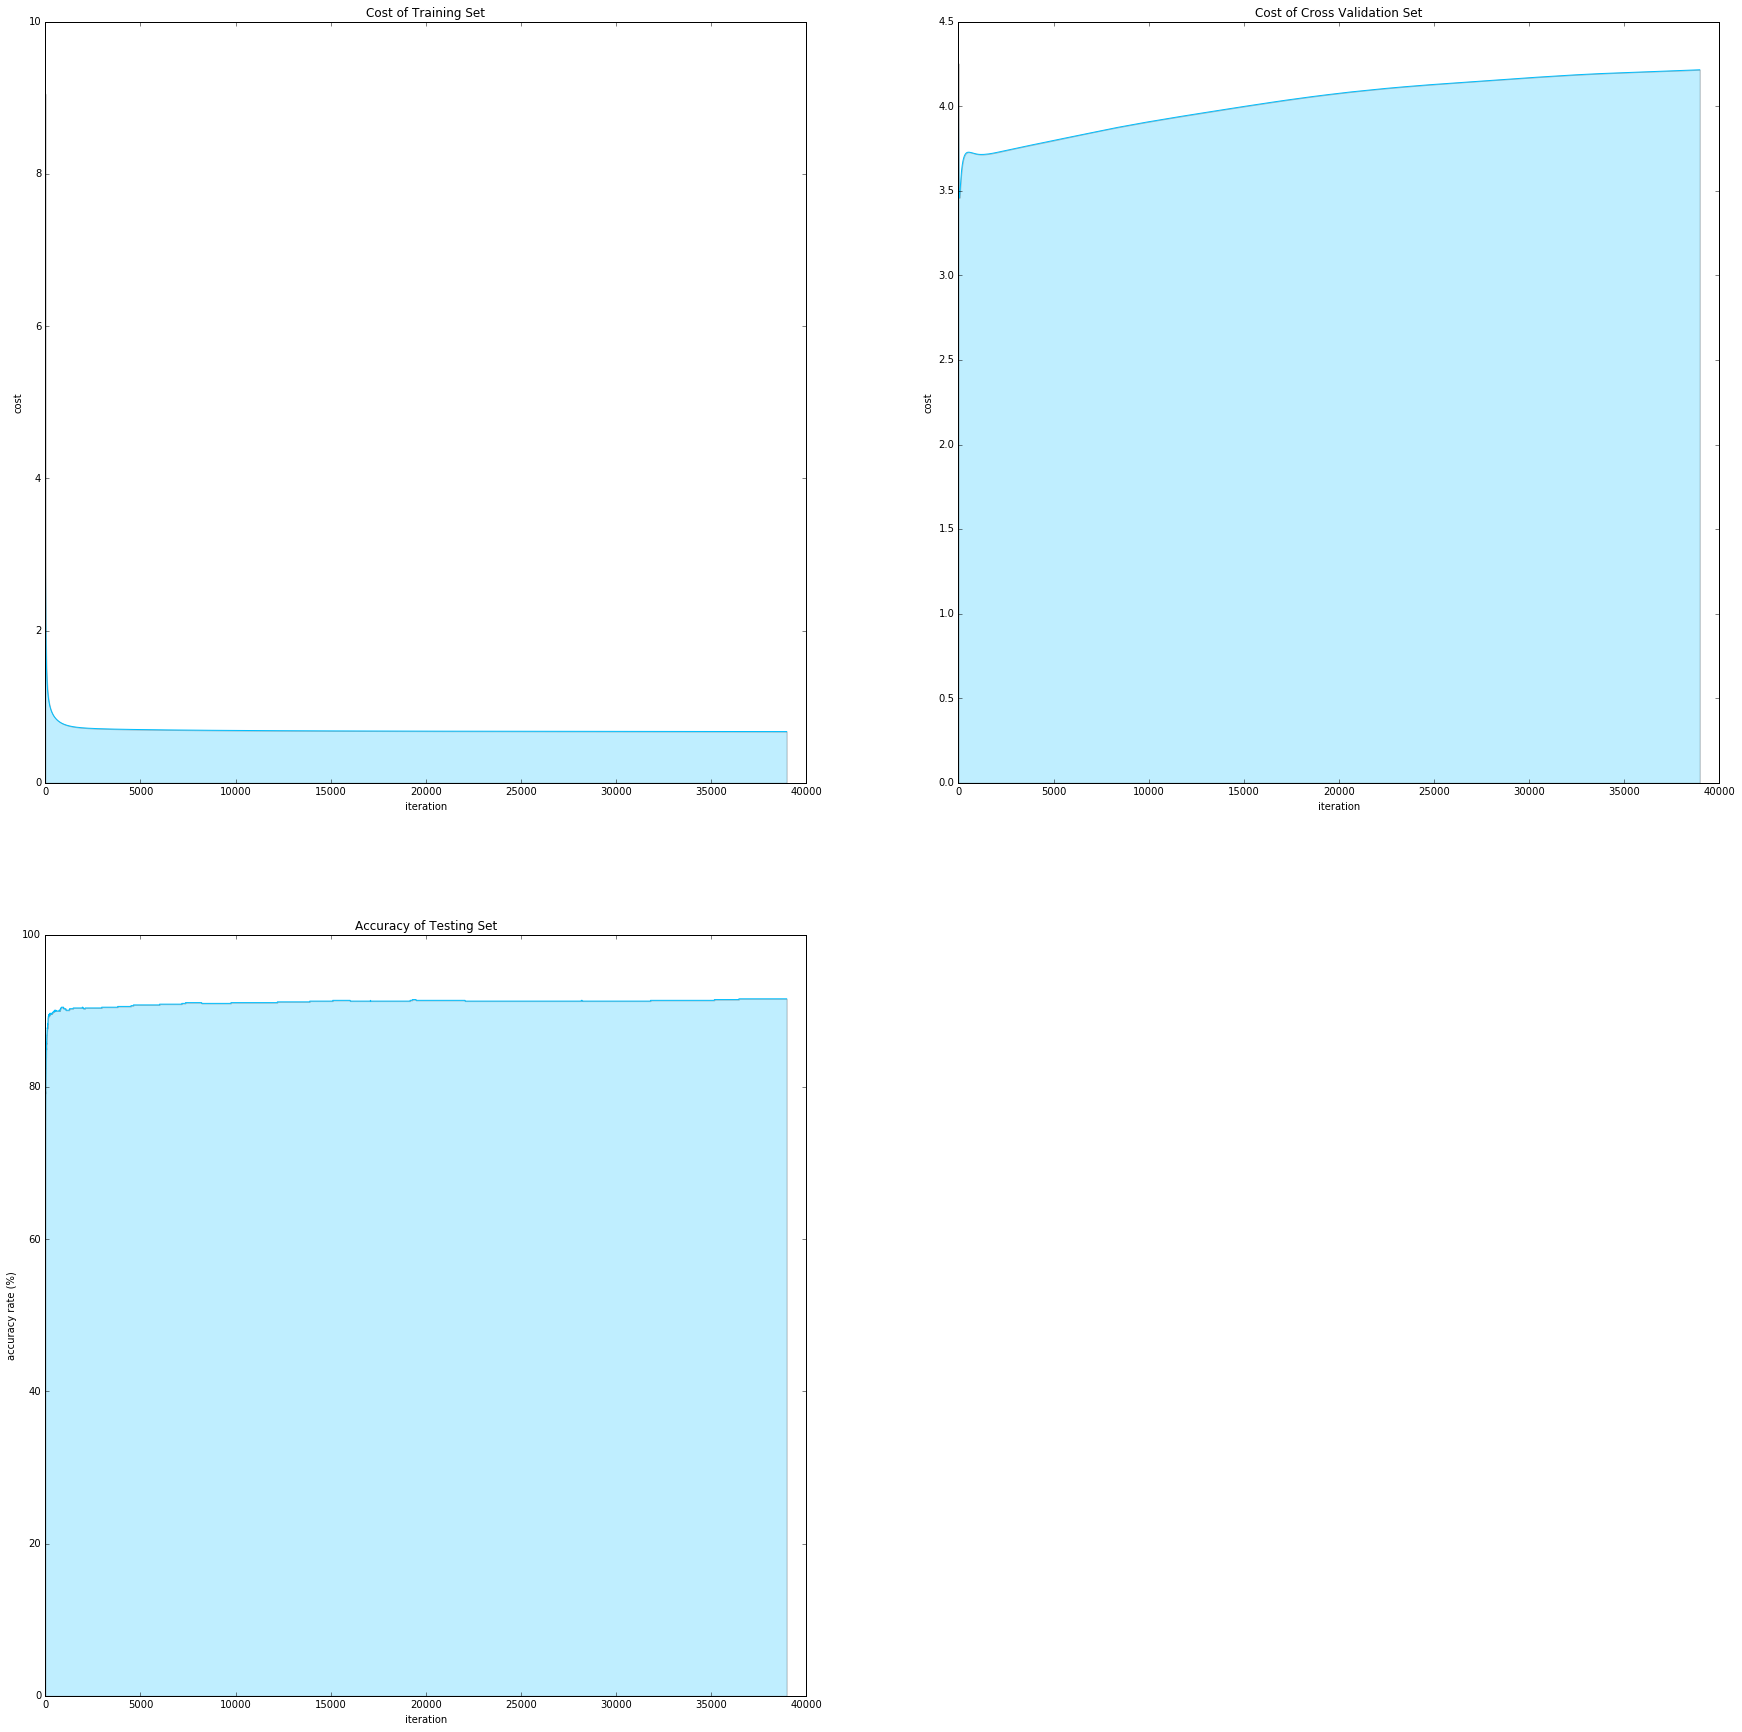

In [6]:
digits_nn.plot_training_info(color='#00BFFF')
digits_nn.show_plot()

## Visualize Theta

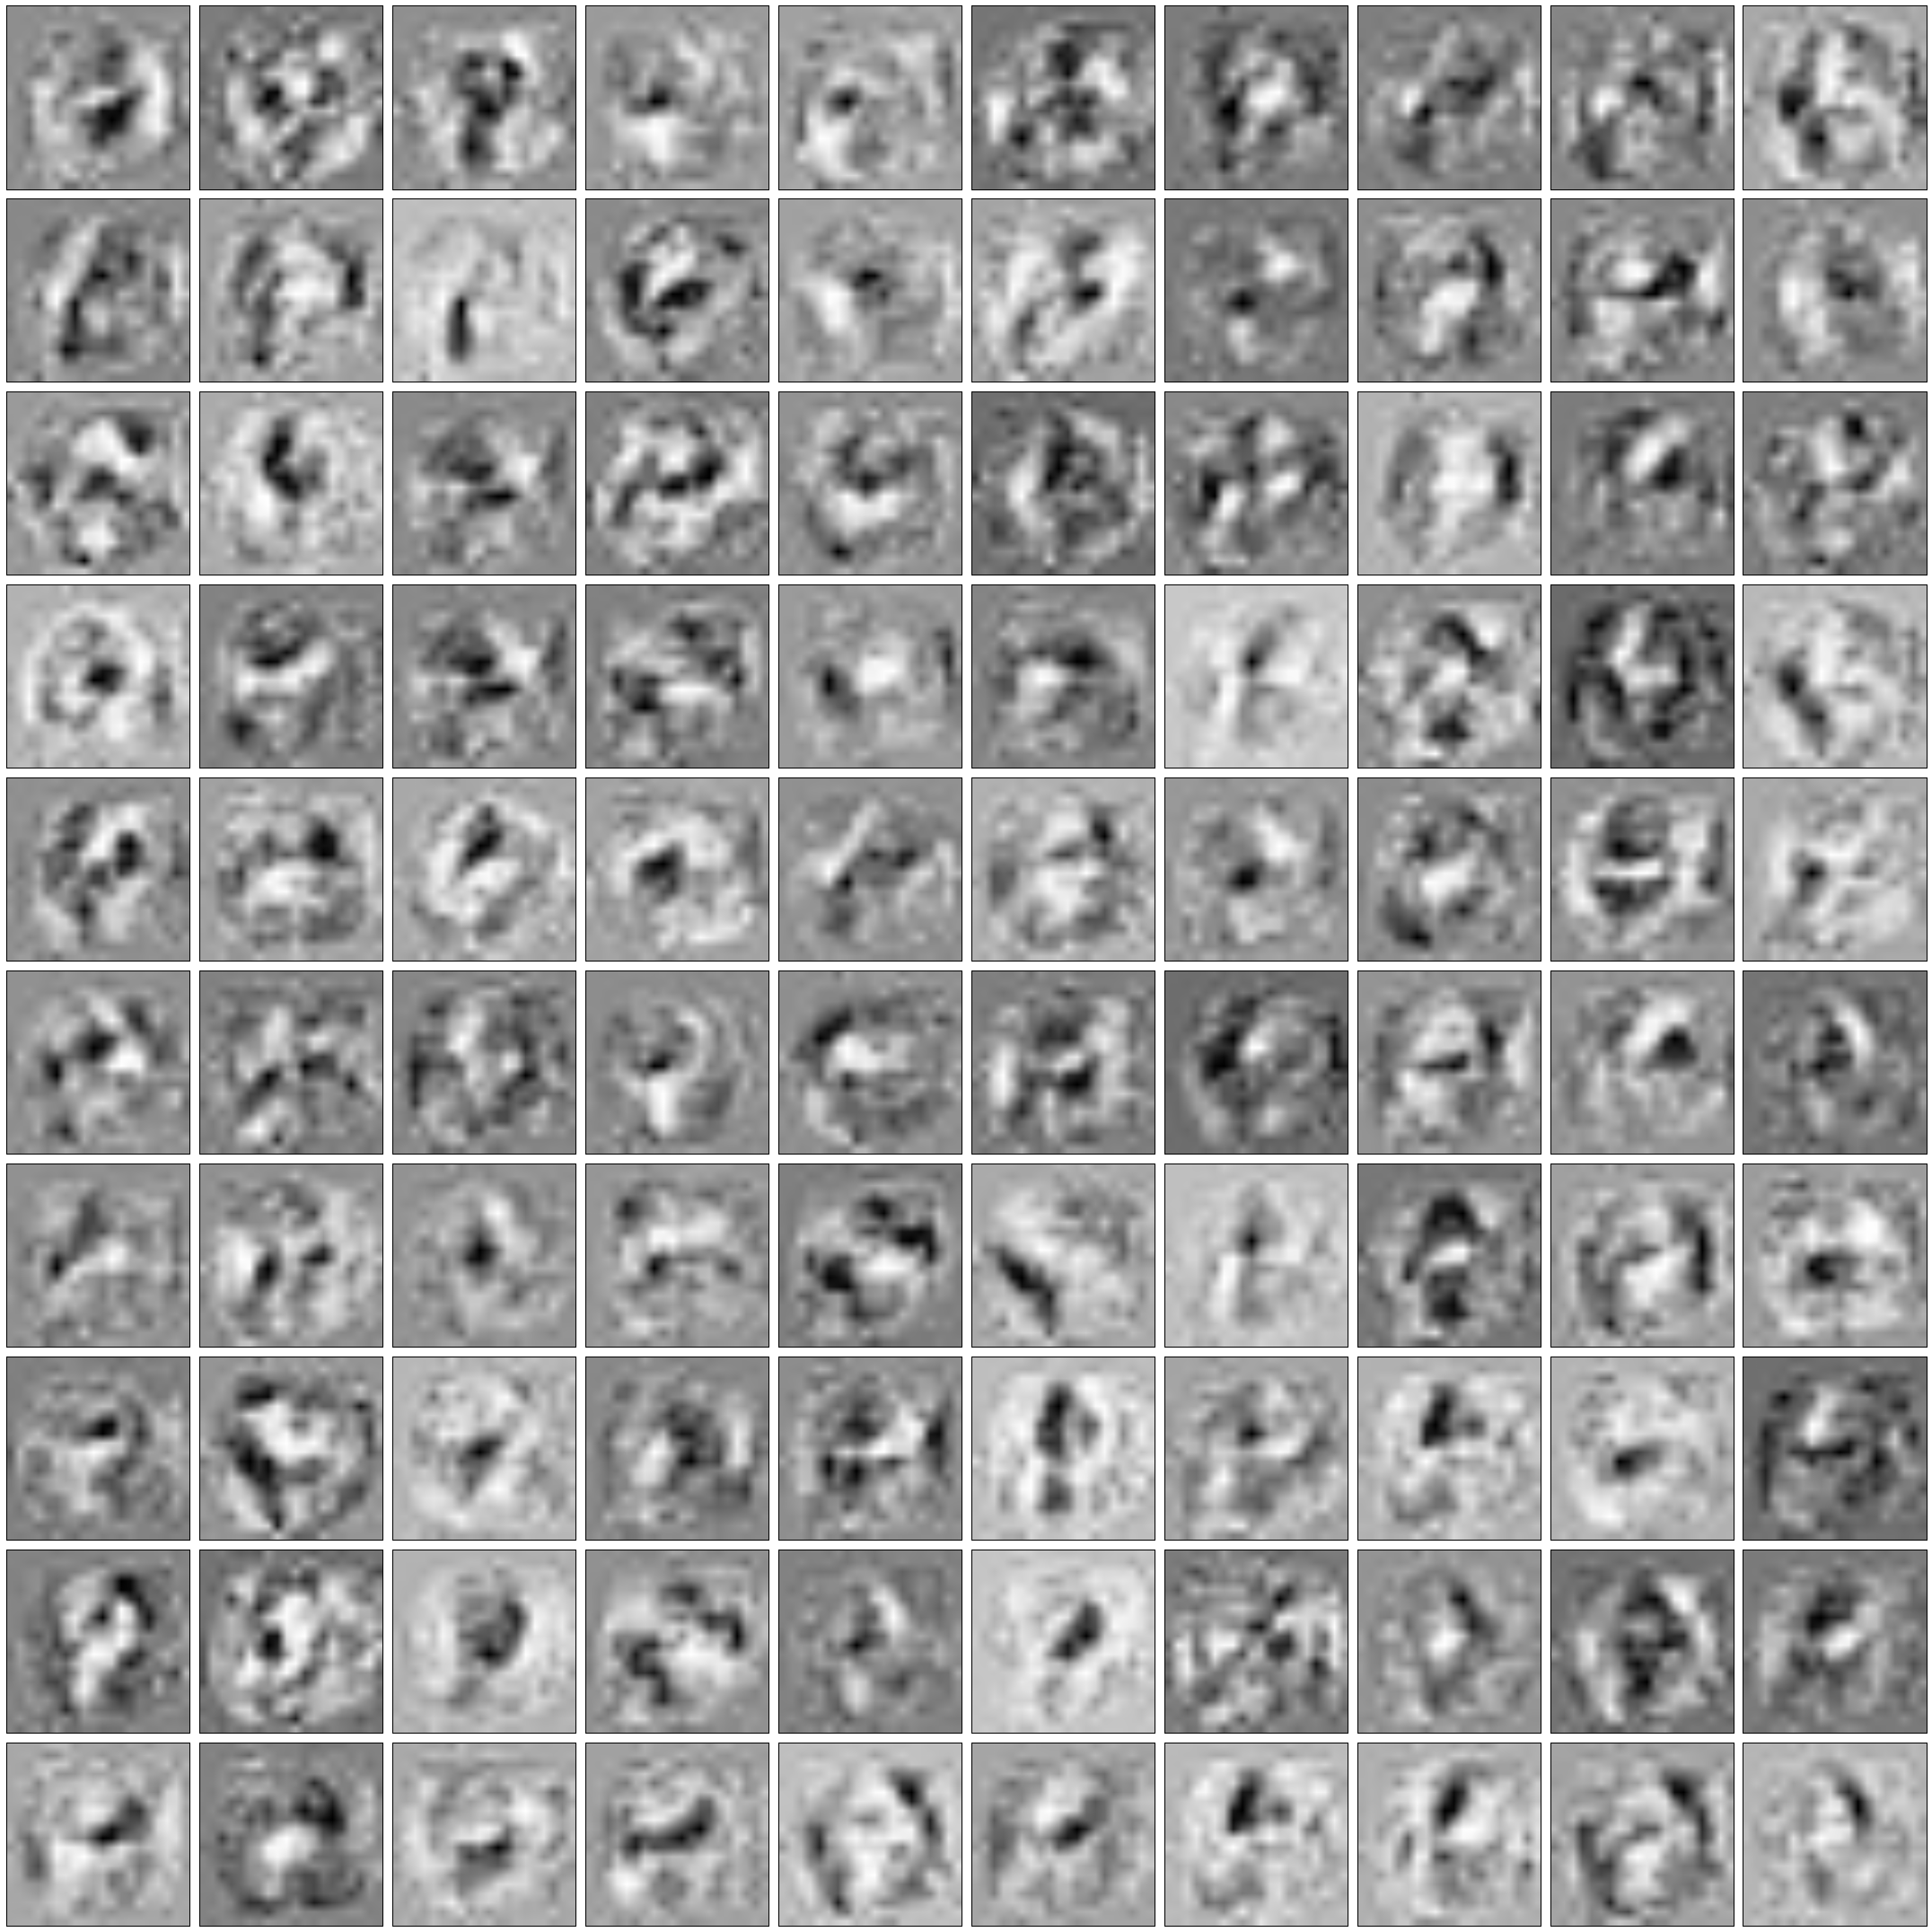

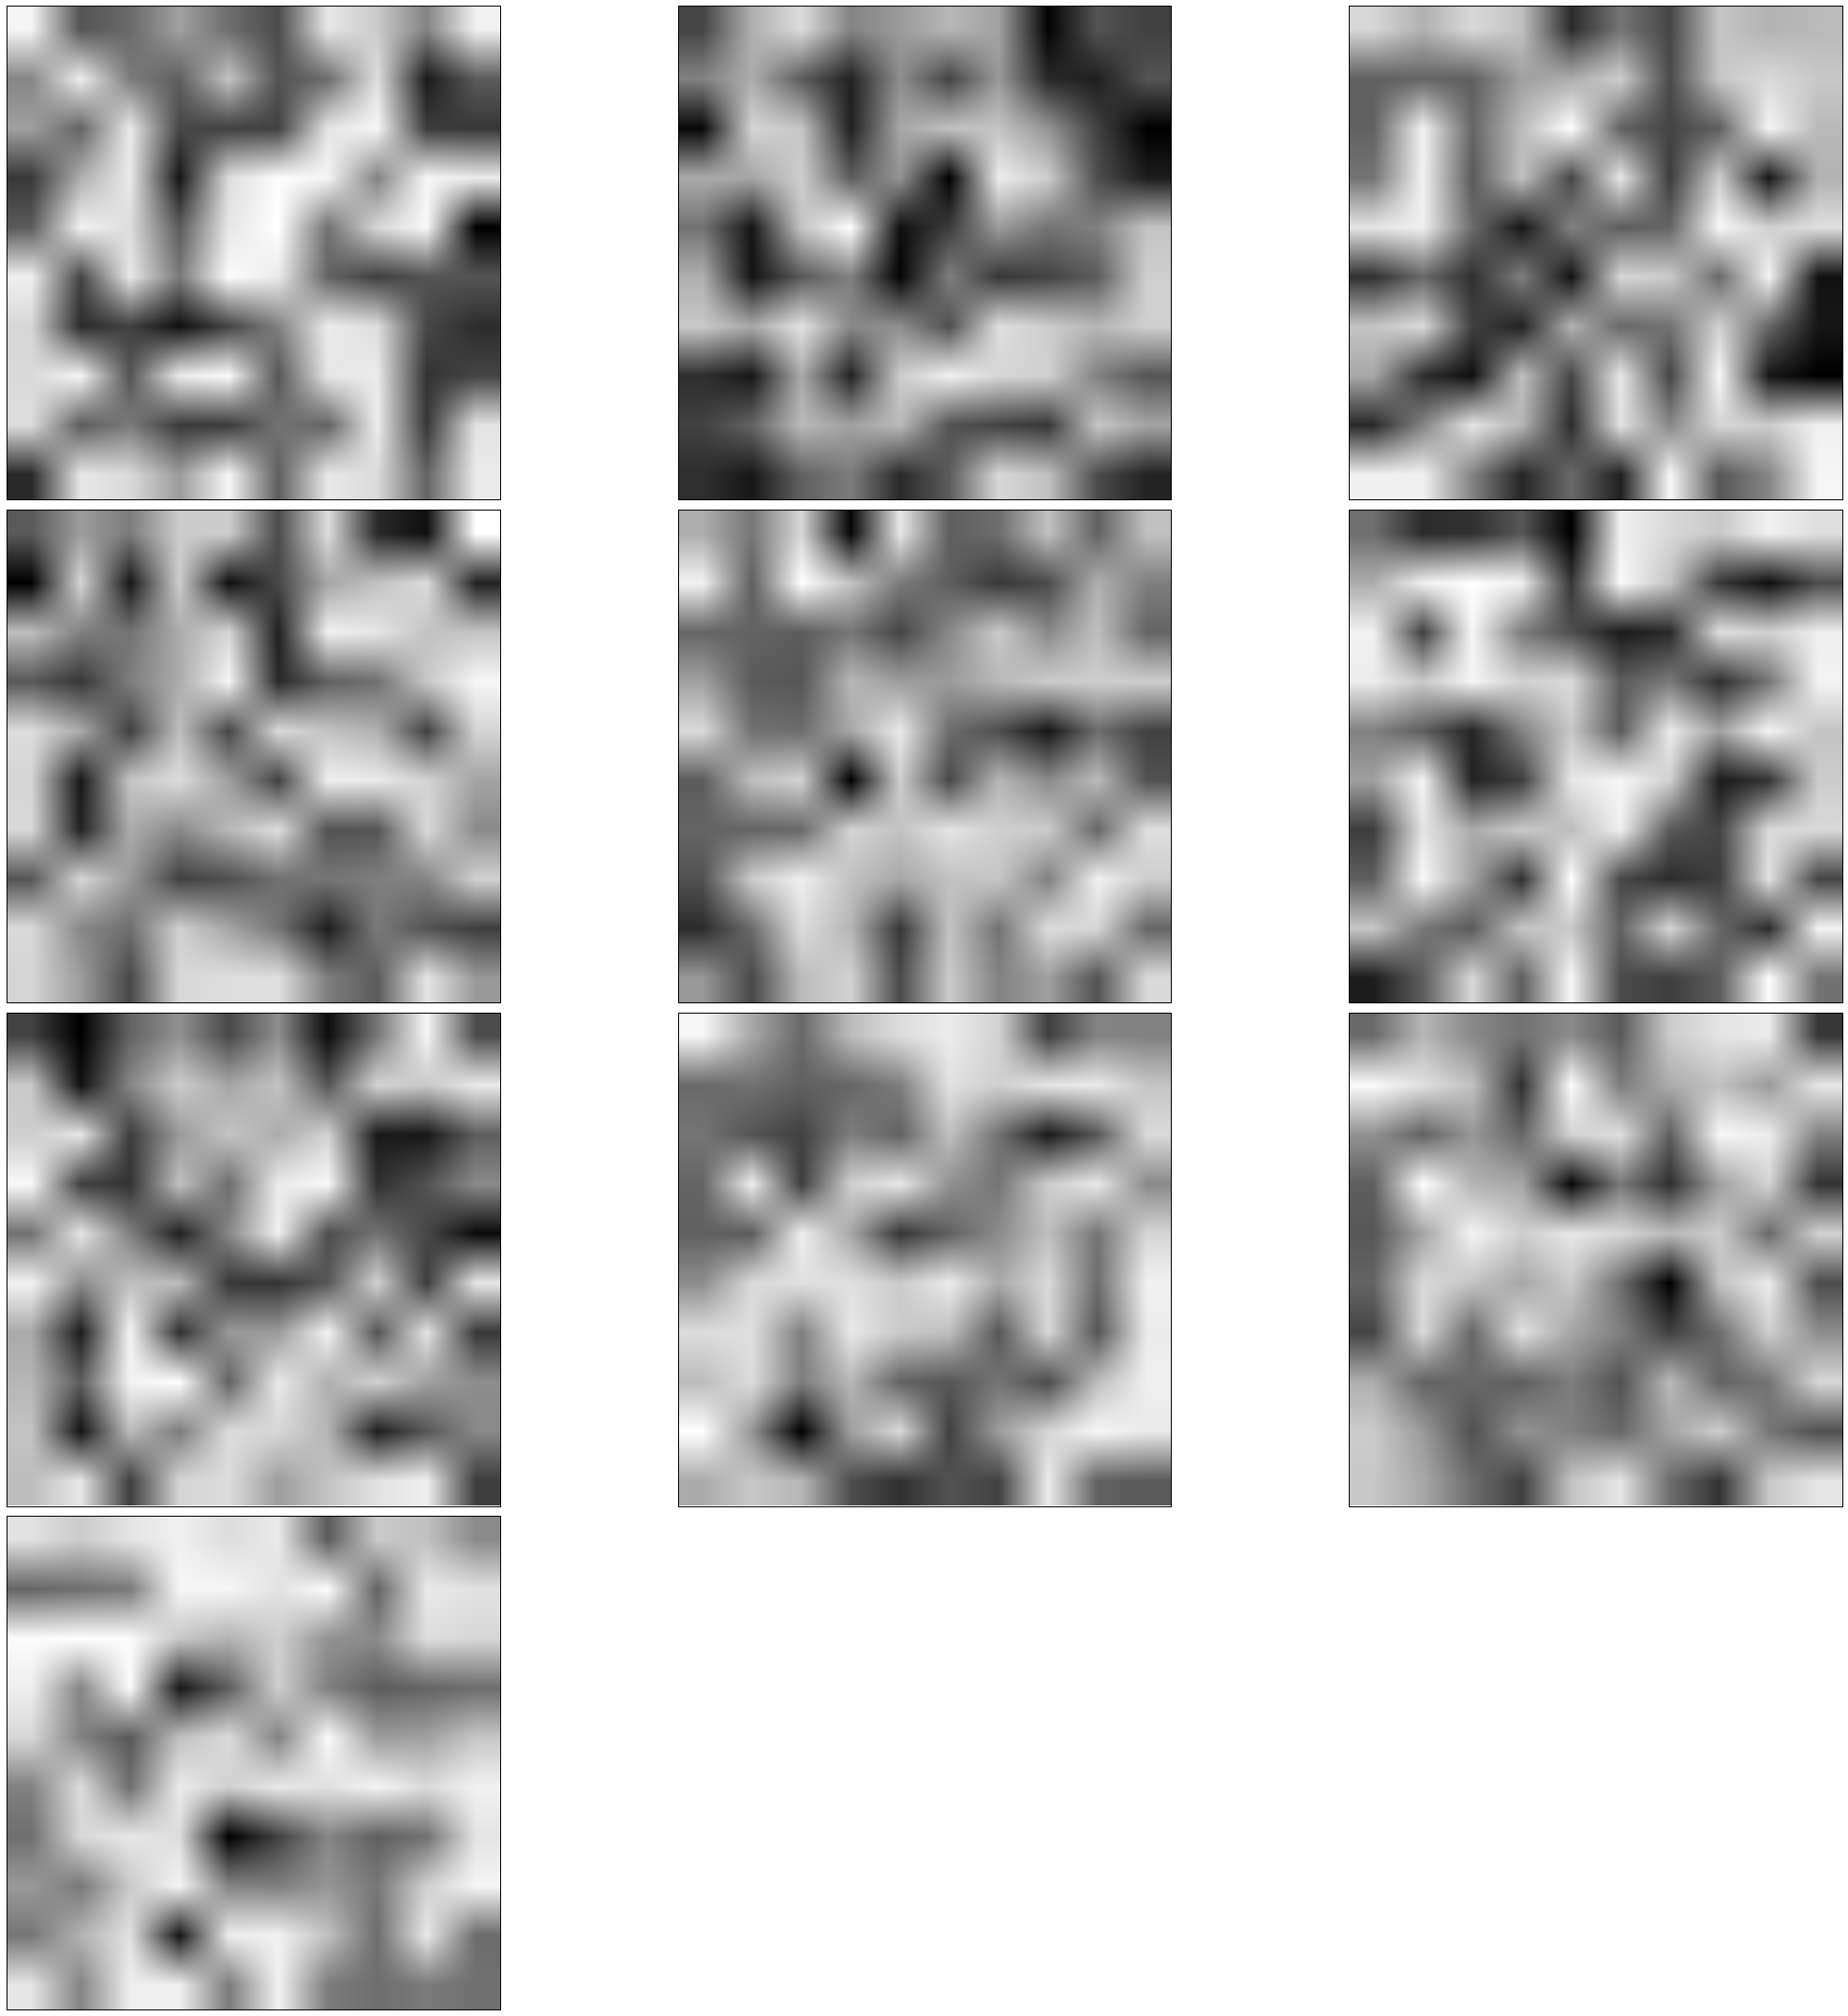

In [7]:
digits_nn.visualize_Theta(cmap='Greys_r')
digits_nn.show_plot()